See this page: https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()
sns.set_context('talk')
sns.set_style("darkgrid", {'axes.grid' : False})

In [2]:
header_list = ['eta', 'x', 'y', 'eps', 'ut', 'ux', 'uy', 'T00', 'T0x', 'T0y', 'T0eta'] 
nx = ny = 200
dx = dy = 0.17 #fm
n_profiles = 3970

n_coarse = 4 # the factor by which we coarse-grain
nx_red = nx / n_coarse
ny_red = ny / n_coarse

def load_ipglasma_profile(i):
    """A function to read in a single ipglasma event profile from disk"""
    df = pd.read_csv('training_profiles/PbPb0-10/epsilon-u-Hydro'+str(i)+'.dat', header=None, 
                 sep=' ', skiprows=1, names=header_list)
    eps = df['eps'].values.reshape(nx, ny)[::n_coarse, ::n_coarse]
    return eps

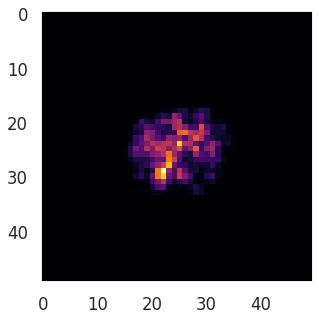

In [3]:
i=np.random.randint(0, high=n_profiles, size=1, dtype='l')[0]
eps = load_ipglasma_profile(i)
fig, axes = plt.subplots(1,1, figsize=(5,5))
plt.imshow(eps, cmap='inferno')

In [4]:
#We will need to rescale all the energy density values from [0, eps_max] -> [0, 1]

#this will loop over all profiles to find eps_max
eps_max = 0.
eps_max = 572.073

#for i in range(1, n_profiles):
#    eps_max = np.maximum(eps_max, load_ipglasma_profile(i).max()  ) 
print("eps_max = " + str(eps_max) )

eps_max = 572.073


In [5]:
#load the training profiles array from disk (faster)
trainX = np.load('training_profiles/trainX.npy')
print(trainX.shape)

img_nx = trainX.shape[1]
img_ny = trainX.shape[1]

(3970, 50, 50)


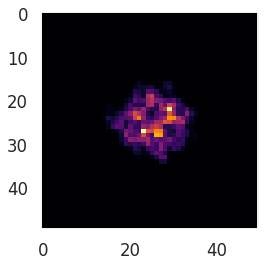

In [6]:
i=np.random.randint(1, high=n_profiles+1, size=1, dtype='l')[0]
plt.imshow(trainX[i], cmap='inferno')

In [ ]:
from keras.models import load_model
model = load_model('generators/generator_model_040.h5')

Using TensorFlow backend.
/users/PAS0254/osu9790/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/users/PAS0254/osu9790/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/users/PAS0254/osu9790/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/users/PAS0254/osu9790/.local/lib/p

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    # generate points in the latent space
    x_input = np.random.randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [ ]:
# generate images
latent_points = generate_latent_points(100, 1)
pred = model.predict(latent_points)[0,:,:,0]
plt.imshow(pred, cmap='inferno')